In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['font.size'] = 22

# Ensemble Model

- Secara ringkas, Ensemble Model adalah membuat prediksi dari hasil agregasi beberapa model.

<img src="https://drive.google.com/uc?id=1vXS4YK29ogq1nsc9sMHj5KAfpuhEbvw9">

- Ensemble model memanfaatkan model satu sama lain untuk membandingkan dan mengkoreksi hasil prediksi

- Sehingga didapat peningkatan performa

In [2]:
# load data

data = pd.read_csv("data/boston_housing.csv")
data = data.rename(columns={'MEDV': 'target'})
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


# STEP BY STEP ML

1. split input-output
2. split train & test 
3. handling masalah yang ada di data training
    - missing value
        - imputasi
            -> numerik --> imput mean atau median atau modus
            -> kategorik --> UNKNOWN atau KOSONG, modus, clustering
        - drop
    - encode variable kategorik --> rubah kategorik jadi numerik
        - One hot encoding
        - label encoding
            -> nama negara --> OHE
            -> rating -> label
    - scaling --> standard scaler.
4. Fitting model --> eksperimentasi
    - baseline model
        - model regresi --> average dari output
        - model klasifikasi --> proporsi dari kelas terbesar.
        
    - acuan untuk membantu kita memilih model terbaik
        - metrik performa --> saat kita melakukan cross validation.
        
    - knn -> jumlah tetangga, distance
    - tree -> max depth, criterion, min sample on leaf
    - linear model -> tidak ada
    - ridge & lasso -> alpha -> penalty regularisasi 
    
5. prediksi di data test -> sanity check performa di data test dari model terbaik.
        
        

In [3]:
X = data.drop(columns = "target")
y = data["target"]

In [79]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [5]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

Split train-test data

In [6]:
from sklearn.model_selection import train_test_split



In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 123)

In [8]:
print(X_train.shape, X_test.shape)

(404, 13) (102, 13)


Normalize data

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
# Buat & Fit scaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [11]:
# Transform data
X_train_clean = scaler.transform(X_train)
X_train_clean = pd.DataFrame(X_train_clean,
                             columns = X_train.columns,
                             index = X_train.index)

X_train_clean

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
203,-0.401149,3.653859,-1.226095,-0.245698,-1.199016,2.231987,-1.278274,0.623686,-0.636934,-1.095990,-1.753696,0.388482,-1.266398
441,0.702723,-0.486534,0.995482,-0.245698,1.587329,0.176596,1.008537,-0.806000,1.675027,1.530409,0.808919,0.313998,0.940407
172,-0.389296,-0.486534,-1.028718,-0.245698,-0.391243,-1.008059,0.697674,-0.557330,-0.521336,-0.668160,-0.868429,0.433478,0.261930
95,-0.391244,-0.486534,-1.195840,-0.245698,-0.950404,0.487675,-0.399281,-0.136278,-0.868130,-0.787002,-0.216127,0.008419,-0.867459
54,-0.403599,2.782197,-1.035921,-0.245698,-1.251491,-0.559197,-0.763742,1.654751,-0.752532,0.359819,1.228256,0.433478,0.277382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,-0.395821,-0.486534,-1.195840,-0.245698,-0.950404,2.185112,-1.146068,-0.136278,-0.868130,-0.787002,-0.216127,0.396673,-1.300111
476,0.149849,-0.486534,0.995482,-0.245698,0.503416,0.287391,0.879904,-0.693513,1.675027,1.530409,0.808919,0.425942,0.822411
322,-0.365143,-0.486534,-0.548961,-0.245698,-0.537485,-0.341868,-0.681559,0.437816,-0.521336,-0.721639,0.529361,0.433478,-0.719964
382,0.641524,-0.486534,0.995482,-0.245698,1.243229,-1.059195,1.108585,-1.032987,1.675027,1.530409,0.808919,0.433478,1.513530


In [12]:
def scaler_transform(X, scaler = None):
    """
    Fungsi untuk melakukan standardisasi
    :param X: <pandas DataFrame> sampel data
    :param scaler: <sklearn object> scaler, default None
    :return X_scaled: <pandas Dataframe> sampel data OHE
    :param scaler: <sklearn object> scaler, default None
    """
    if scaler != None:
        pass
    else:
        # Buat & fit encoder
        scaler = StandardScaler()
        scaler.fit(X)

    # Tranform data
    X_scaled = scaler.transform(X)
    X_scaled = pd.DataFrame(X_scaled,
                            columns = X.columns,
                            index = X.index)
    
    return X_scaled, scaler


In [13]:
X_train_clean, scaler = scaler_transform(X = X_train)
X_train_clean.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
203,-0.401149,3.653859,-1.226095,-0.245698,-1.199016,2.231987,-1.278274,0.623686,-0.636934,-1.095990,-1.753696,0.388482,-1.266398
441,0.702723,-0.486534,0.995482,-0.245698,1.587329,0.176596,1.008537,-0.806000,1.675027,1.530409,0.808919,0.313998,0.940407
172,-0.389296,-0.486534,-1.028718,-0.245698,-0.391243,-1.008059,0.697674,-0.557330,-0.521336,-0.668160,-0.868429,0.433478,0.261930
95,-0.391244,-0.486534,-1.195840,-0.245698,-0.950404,0.487675,-0.399281,-0.136278,-0.868130,-0.787002,-0.216127,0.008419,-0.867459
54,-0.403599,2.782197,-1.035921,-0.245698,-1.251491,-0.559197,-0.763742,1.654751,-0.752532,0.359819,1.228256,0.433478,0.277382


Transform data test

In [14]:
def prepare_test(X, scaler):  
    # Scaled data
    X_clean, _ = scaler_transform(X = X,
                                  scaler = scaler)
    
    return X_clean

In [15]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
410,51.13580,0.0,18.10,0,0.5970,5.757,100.0,1.4130,24,666.0,20.2,2.60,10.11
85,0.05735,0.0,4.49,0,0.4490,6.630,56.1,4.4377,3,247.0,18.5,392.30,6.53
280,0.03578,20.0,3.33,0,0.4429,7.820,64.5,4.6947,5,216.0,14.9,387.31,3.76
422,12.04820,0.0,18.10,0,0.6140,5.648,87.6,1.9512,24,666.0,20.2,291.55,14.10
199,0.03150,95.0,1.47,0,0.4030,6.975,15.3,7.6534,3,402.0,17.0,396.90,4.56


In [16]:
X_test_clean = prepare_test(X = X_test, 
                            scaler = scaler)

X_test_clean.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
410,5.420728,-0.486534,0.995482,-0.245698,0.357173,-0.745275,1.108585,-1.111381,1.675027,1.530409,0.808919,-3.872802,-0.381428
85,-0.398615,-0.486534,-0.965327,-0.245698,-0.915994,0.494777,-0.460024,0.305098,-0.752532,-0.959322,0.016838,0.383239,-0.884316
280,-0.401072,0.385128,-1.132449,-0.245698,-0.968469,2.185112,-0.159880,0.425453,-0.521336,-1.143527,-1.660510,0.328742,-1.273421
422,0.967497,-0.486534,0.995482,-0.245698,0.503416,-0.900104,0.665515,-0.859340,1.675027,1.530409,0.808919,-0.717084,0.179052
199,-0.401560,3.653859,-1.400421,-0.245698,-1.311708,0.984832,-1.917867,1.811024,-0.752532,-0.038300,-0.682057,0.433478,-1.161044


Baseline Model

In [17]:
y_pred_baseline = y_train.mean()
y_pred_baseline

22.37475247524753

---
MSE & RMSE sensitive terhadap outlier,
MAE tidak

RMSE & MAE punya satuan yang sama dengan target sehingga lebih mudah diinterpretasikan

In [18]:
from sklearn.metrics import mean_absolute_error

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [19]:
mae_train_baseline = mean_absolute_error(y_train, y_pred_baseline * np.ones(len(y_train)))
mae_test_baseline = mean_absolute_error(y_test, y_pred_baseline * np.ones(len(y_test)))

mae_train_baseline, mae_test_baseline

(6.583749142240957, 6.7705494078819655)

---
# Decision Tree

Lakukan gridsearch

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [21]:
params = {"max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Buat gridsearch
tree = DecisionTreeRegressor(random_state = 123)

tree_cv = GridSearchCV(estimator = tree,
                       param_grid = params,
                       cv = 5,
                       scoring = "neg_mean_absolute_error")

In [22]:
# Fit grid search cv
tree_cv.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_absolute_error')

In [23]:
# Best params
tree_cv.best_params_

{'max_depth': 7}

In [24]:
# Refit the bagging tree
tree = DecisionTreeRegressor(max_depth = tree_cv.best_params_["max_depth"],
                             random_state = 123)

tree.fit(X_train_clean, y_train)

DecisionTreeRegressor(max_depth=7, random_state=123)

In [25]:
# Predict
y_pred_train = tree.predict(X_train_clean)

# MSE
mae_train_dt = mean_absolute_error(y_train, y_pred_train)
mae_cv_dt = -tree_cv.best_score_

print(f"MAE Train :{mae_train_dt:.4f}")
print(f"MAE CV    :{mae_cv_dt:.4f}")

MAE Train :1.2526
MAE CV    :3.1751


---
# Bagging Method
1. Membuat $B$-sampel bootstrap
2. Membuat $B$-model decision tree untuk masing-masing sampel
3. Setiap model melakukan prediksi.
4. Melakukan agregasi dari setiap hasil prediksi.
    - Regresi menggunakan rata-rata
    - Klasifikasi menggunakan majority vote

from scratch

In [26]:
# Fungsi Bagging
def bagging(X_train, y_train, B):
    """
    Fungsi untuk membuat model bagging
    :param X_train: <pandas Dataframe> sampel input
    :param y_train: <pandas Dataframe> sampel output
    :param B: <int> jumlah bootstrap sample
    :return trees: <list> kumpulan tree
    """
    N = len(X_train)
    trees = []

    for b in range(B):
        # Buat bootstrap
        sample = np.random.choice(X_train.index,
                                  size = N,
                                  replace = True)
        
        X_train_b = X_train.loc[sample]
        y_train_b = y_train.loc[sample]

        # Buat model
        tree = DecisionTreeRegressor()
        tree.fit(X_train_b, y_train_b)

        # Append tree
        trees.append(tree)

    return trees


In [27]:
bagging_mdl = bagging(X_train = X_train_clean, 
                      y_train = y_train, 
                      B = 5)

bagging_mdl

[DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor()]

In [28]:
# Fungsi predict
def predict_bagging(estimator, X):
    """
    Fungsi untuk melakukan prediksi
    :param estimator: <list> list model
    :param X: <pandas Dataframe> sampel input
    :param y_pred: <pandas Dataframe> prediksi sampel output
    """
    B = len(estimator)
    N = X.shape[0]
    y_pred_list = np.zeros((B, N))

    for i, tree in enumerate(estimator):
        # Predict
        y_pred_list[i] = tree.predict(X)

    # Average
    y_pred = np.mean(y_pred_list, axis = 0)

    return y_pred

In [29]:
# Predict
y_pred_train = predict_bagging(estimator = bagging_mdl,
                               X = X_train_clean)
y_pred_test = predict_bagging(estimator = bagging_mdl,
                              X = X_test_clean)

In [30]:
# Calculate MAE
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

mae_train, mae_test

(1.0441584158415842, 2.6515686274509798)

In [31]:
# Lakukan perulangan
B = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
mae_train_list = []
mae_test_list = []

for b in B:
    # Buat bagging model
    bagging_mdl = bagging(X_train = X_train_clean, 
                          y_train = y_train, 
                          B = b)
    
    # Predict
    y_pred_train = predict_bagging(estimator = bagging_mdl,
                                   X = X_train_clean)
    y_pred_test = predict_bagging(estimator = bagging_mdl,
                                  X = X_test_clean)

    # Calculate mae
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    # Append MSE
    mae_train_list.append(mae_train)
    mae_test_list.append(mae_test)
    
    # B adalah n_estimators dalam sklearn

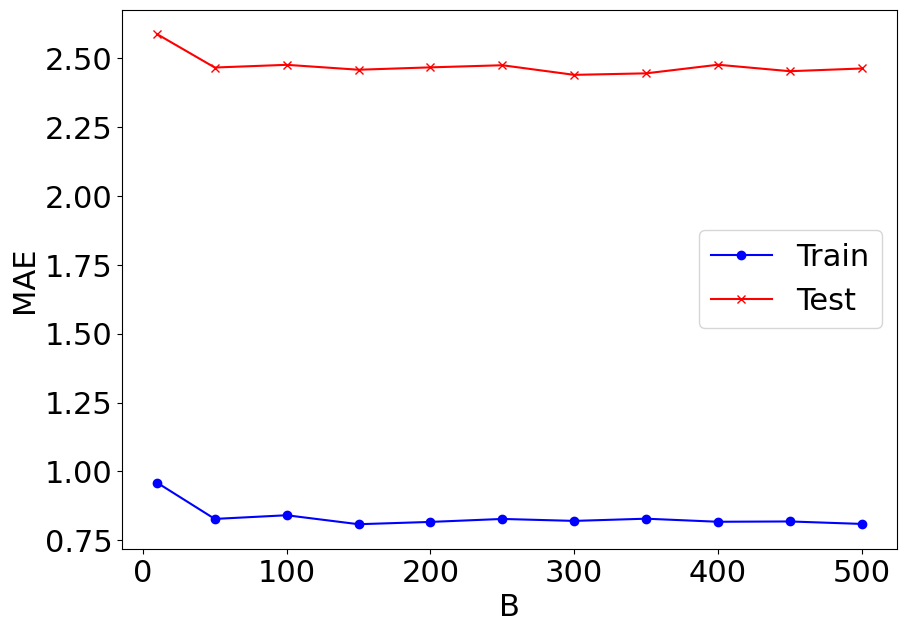

In [32]:
# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

ax.plot(B, mae_train_list, "b", marker = "o", label = "Train")
ax.plot(B, mae_test_list, "r", marker = "x", label = "Test")

ax.set_xlabel("B")
ax.set_ylabel("MAE")
plt.legend()
plt.show()

<font color='red'>
Catatan! - Gambar di atas hanya menunjukkan kalau makin besar nilai B, model tidak akan overfit.

Pemilihan model terbaik <b>tidak</b> dilakukan dengan melihat performa test, <b>namun</b> dengan melihat performa CV.
</font>

<font color='red'>
hyperparameters tidak boleh dituning dalam test training!
</font>

with Sklearn!

In [33]:
from sklearn.ensemble import BaggingRegressor

In [34]:
# Base estimator
tree = DecisionTreeRegressor()

# Buat Bagging
bagging_tree = BaggingRegressor(base_estimator = tree,
                                n_estimators = 10,
                                random_state = 123)

# Fit bagging
bagging_tree.fit(X_train_clean, y_train)

c:\Users\waviv\anaconda3\envs\dash_testing_map\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=123)

In [35]:
# Predict
y_pred_train = bagging_tree.predict(X_train_clean)

# MSE
mae_train = mean_absolute_error(y_train, y_pred_train)

print(f"MAE Train :{mae_train:.4f}")

MAE Train :0.9038


lakukan gridsearch

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
params = {"n_estimators": B}

# Buat gridsearch
tree = DecisionTreeRegressor()
bagging_tree = BaggingRegressor(base_estimator = tree,
                                random_state = 123)

bagging_cv = GridSearchCV(estimator = bagging_tree,
                          param_grid = params,
                          cv = 5,
                          scoring = "neg_mean_absolute_error")

In [38]:
# Fit grid search cv
bagging_cv.fit(X_train_clean, y_train)

c:\Users\waviv\anaconda3\envs\dash_testing_map\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\waviv\anaconda3\envs\dash_testing_map\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\waviv\anaconda3\envs\dash_testing_map\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


c:\Users\waviv\anaconda3\envs\dash_testing_map\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\waviv\anaconda3\envs\dash_testing_map\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\waviv\anaconda3\envs\dash_testing_map\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\waviv\anaconda3\envs\dash_testing_map\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\waviv\anaconda3\envs\dash_testing_map\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed 

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                        random_state=123),
             param_grid={'n_estimators': [10, 50, 100, 150, 200, 250, 300, 350,
                                          400, 450, 500]},
             scoring='neg_mean_absolute_error')

In [39]:
# Best params
bagging_cv.best_params_

{'n_estimators': 300}

In [40]:
# Refit the bagging tree
bagging_tree = BaggingRegressor(base_estimator = tree,
                                n_estimators = bagging_cv.best_params_["n_estimators"],
                                random_state = 123)

bagging_tree.fit(X_train_clean, y_train)

c:\Users\waviv\anaconda3\envs\dash_testing_map\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=300,
                 random_state=123)

In [41]:
# Predict
y_pred_train = bagging_tree.predict(X_train_clean)

# MSE
mae_train_bg = mean_absolute_error(y_train, y_pred_train)
mae_cv_bg = -bagging_cv.best_score_

print(f"MAE Train :{mae_train_bg:.4f}")
print(f"MAE CV    :{mae_cv_bg:.4f}")

# dalam real life
# grid search dan bagging optimization bisa digunakan untuk mencari hyperparameters optimal, dan ini memakan waktu
# oleh karena itu, balik lagi ke pengalaman

# apabila dalam base model decision tree, dalam hyperparameters searchnya itu bisa diatur training setnya (bootstrap set)
# LIBRARY XGBM, proporsi col sample by tree bisa dimainin presentasenya

MAE Train :0.8124
MAE CV    :2.3051


- error yang diabsolute kan
- nilai prediksi - nilai asli
- harga prediksi - harga asli --> deviasi harga

---
# Random Forest Method
1. Membuat $B$-sampel bootstrap
2. Menentukan $p$ fitur yang digunakan untuk membuat model Decision Tree
3. Membuat $B$-model decision tree untuk masing-masing sampel
4. Setiap model melakukan prediksi.
5. Melakukan agregasi dari setiap hasil prediksi.
    - Regresi menggunakan rata-rata
    - Klasifikasi menggunakan majority vote

with sklearn

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
# Build random forest
rf_tree = RandomForestRegressor(n_estimators = 100,
                                criterion = "squared_error",
                                max_features = "sqrt",
                                random_state = 123)

In [44]:
# Fit random forest
rf_tree.fit(X_train_clean, y_train)

RandomForestRegressor(max_features='sqrt', random_state=123)

In [45]:
# Predict
y_pred_train = rf_tree.predict(X_train_clean)
y_pred_test = rf_tree.predict(X_test_clean)

# MSE
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

mae_train, mae_test

(0.8026534653465325, 2.1940980392156866)

Lakukan gridsearch

In [46]:
params = {"n_estimators": B,
          "max_features": ["sqrt", "log2"]}

# Buat gridsearch
rf_tree = RandomForestRegressor(criterion = "squared_error",
                                random_state = 123)

rf_tree_cv = GridSearchCV(estimator = rf_tree,
                          param_grid = params,
                          cv = 5,
                          scoring = "neg_mean_absolute_error")

In [47]:
# Fit grid search cv
rf_tree_cv.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 150, 200, 250, 300, 350,
                                          400, 450, 500]},
             scoring='neg_mean_absolute_error')

In [48]:
# Best params
rf_tree_cv.best_params_

{'max_features': 'sqrt', 'n_estimators': 100}

In [49]:
# Refit the Random Forest
rf_tree = RandomForestRegressor(criterion = "squared_error",
                                max_features = rf_tree_cv.best_params_["max_features"],
                                n_estimators = rf_tree_cv.best_params_["n_estimators"],
                                random_state = 123)

rf_tree.fit(X_train_clean, y_train)

RandomForestRegressor(max_features='sqrt', random_state=123)

In [50]:
# Predict
y_pred_train = rf_tree.predict(X_train_clean)

# MSE
mae_train_rf = mean_absolute_error(y_train, y_pred_train)
mae_cv_rf = -rf_tree_cv.best_score_

print(f"MAE Train :{mae_train_rf:.4f}")
print(f"MAE CV    :{mae_cv_rf:.4f}")

MAE Train :0.8027
MAE CV    :2.2330


---
# Adaboost Method
1. Set weight data sama
2. Bootstrap data
3. Buat simple decision tree (Stomps / weak learner) -- decision tree dengan 1 atau 2 split
4. Fit decision tree ke data
5. Predict error dari hasil fitting
6. Atur ulang weight (menggunakan formula di slide)
7. Ulangi kembali langkah 2-6 untuk n-estimators
8. Hasil prediksi adalah jumlah berbobot dari prediksi weak learner yang dikumpulkan


with sklearn

In [51]:
from sklearn.ensemble import AdaBoostRegressor

In [52]:
# Build random forest
tree = DecisionTreeRegressor(max_depth = 3)
ada_tree = AdaBoostRegressor(base_estimator = tree,
                             n_estimators = 50,
                             random_state = 123)

In [53]:
# Fit random forest
ada_tree.fit(X_train_clean, y_train)

c:\Users\waviv\anaconda3\envs\dash_testing_map\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  random_state=123)

In [54]:
# Predict
y_pred_train = ada_tree.predict(X_train_clean)
y_pred_test = ada_tree.predict(X_test_clean)

# MSE
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

mae_train, mae_test

(2.191719072690198, 2.8608215669541424)

In [55]:
params = {"n_estimators": B}

# Buat gridsearch
tree = DecisionTreeRegressor(max_depth = 3)
ada_tree = AdaBoostRegressor(base_estimator = tree,
                             random_state = 123)

ada_tree_cv = GridSearchCV(estimator = ada_tree,
                           param_grid = params,
                           cv = 5,
                           scoring = "neg_mean_absolute_error")

In [56]:
# Fit grid search cv
ada_tree_cv.fit(X_train_clean, y_train)

c:\Users\waviv\anaconda3\envs\dash_testing_map\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\waviv\anaconda3\envs\dash_testing_map\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\waviv\anaconda3\envs\dash_testing_map\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\waviv\anaconda3\envs\dash_testing_map\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\waviv\anaconda3\envs\dash_testing_map\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed 

c:\Users\waviv\anaconda3\envs\dash_testing_map\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\waviv\anaconda3\envs\dash_testing_map\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\waviv\anaconda3\envs\dash_testing_map\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\waviv\anaconda3\envs\dash_testing_map\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\waviv\anaconda3\envs\dash_testing_map\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed 

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                                         random_state=123),
             param_grid={'n_estimators': [10, 50, 100, 150, 200, 250, 300, 350,
                                          400, 450, 500]},
             scoring='neg_mean_absolute_error')

In [57]:
# Best params
ada_tree_cv.best_params_

{'n_estimators': 200}

In [58]:
# Refit the Adaboost
tree = DecisionTreeRegressor(max_depth = 3)
ada_tree = AdaBoostRegressor(base_estimator = tree,
                             n_estimators = ada_tree_cv.best_params_["n_estimators"],
                             random_state = 123)

ada_tree.fit(X_train_clean, y_train)

c:\Users\waviv\anaconda3\envs\dash_testing_map\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  n_estimators=200, random_state=123)

In [59]:
# Predict
y_pred_train = ada_tree.predict(X_train_clean)

# MSE
mae_train_ab = mean_absolute_error(y_train, y_pred_train)
mae_cv_ab = -ada_tree_cv.best_score_

print(f"MAE Train :{mae_train_ab:.4f}")
print(f"MAE CV    :{mae_cv_ab:.4f}")

MAE Train :2.1640
MAE CV    :2.7185


---
# Better Version of Boosting - Gradient Boosting Method

*with sklearn*

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

# gradient boosting ini lebih sering dipake
# involve kompleks perhitungan gradien dsb.

In [61]:
# Build random forest
grad_tree = GradientBoostingRegressor(random_state = 123)

In [62]:
# Fit random forest
grad_tree.fit(X_train_clean, y_train)

GradientBoostingRegressor(random_state=123)

In [63]:
# Predict
y_pred_train = grad_tree.predict(X_train_clean)
y_pred_test = grad_tree.predict(X_test_clean)

# MSE
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

mae_train, mae_test

(1.0523100481329308, 2.31897013246593)

In [64]:
params = {"n_estimators": B}

# Buat gridsearch
grad_tree = GradientBoostingRegressor(random_state = 123)

grad_tree_cv = GridSearchCV(estimator = grad_tree,
                           param_grid = params,
                           cv = 5,
                           scoring = "neg_mean_absolute_error")

In [65]:
# Fit grid search cv
grad_tree_cv.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=123),
             param_grid={'n_estimators': [10, 50, 100, 150, 200, 250, 300, 350,
                                          400, 450, 500]},
             scoring='neg_mean_absolute_error')

In [66]:
# Best params
grad_tree_cv.best_params_

{'n_estimators': 150}

In [67]:
# Refit the Adaboost
grad_tree = GradientBoostingRegressor(n_estimators = grad_tree_cv.best_params_["n_estimators"],
                                      random_state = 123)

grad_tree.fit(X_train_clean, y_train)

GradientBoostingRegressor(n_estimators=150, random_state=123)

In [68]:
# Predict
y_pred_train = grad_tree.predict(X_train_clean)

# MSE
mae_train_gb = mean_absolute_error(y_train, y_pred_train)
mae_cv_gb = -grad_tree_cv.best_score_

print(f"MAE Train :{mae_train_gb:.4f}")
print(f"MAE CV    :{mae_cv_gb:.4f}")

MAE Train :0.8100
MAE CV    :2.2349


---
# Comparison

In [69]:
mae_train = [mae_train_dt, mae_train_bg, mae_train_rf, mae_train_ab, mae_train_gb]
mae_cv = [mae_cv_dt, mae_cv_bg, mae_cv_rf, mae_cv_ab, mae_cv_gb]
indexes = ["decision tree", "bagging", "random forest", "adaBoost", "gradientBoost"]

summary_df = pd.DataFrame({"MAE Train": mae_train,
                           "MAE CV": mae_cv},
                          index = indexes)
summary_df

,MAE Train,MAE CV
decision tree,1.252579,3.175117
bagging,0.812393,2.305093
random forest,0.802653,2.232963
adaBoost,2.163998,2.718546
gradientBoost,0.810002,2.234861


---
# Best Model

**Random Forest**

In [70]:
# Predict MAE
y_pred_test = rf_tree.predict(X_test_clean)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_test, mae_test_baseline

(2.1940980392156866, 6.7705494078819655)

---
# Error Analysis

In [71]:
import matplotlib.pyplot as plt

(0.0, 60.0)

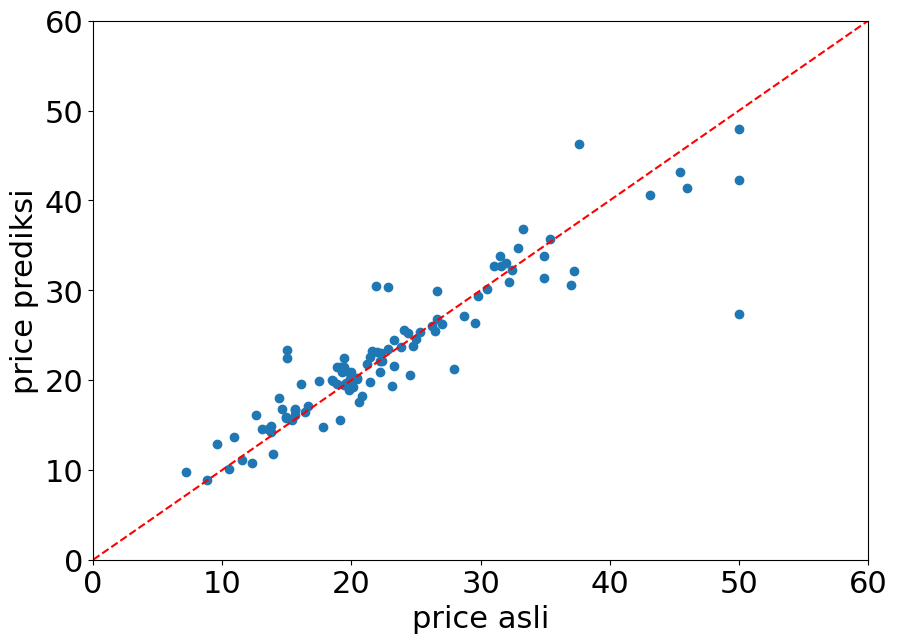

In [72]:
plt.scatter(y_test, y_pred_test)
plt.plot([0, 60], [0,60], "--r")

plt.xlabel("price asli")
plt.ylabel("price prediksi")
plt.xlim(0, 60)
plt.ylim(0, 60)


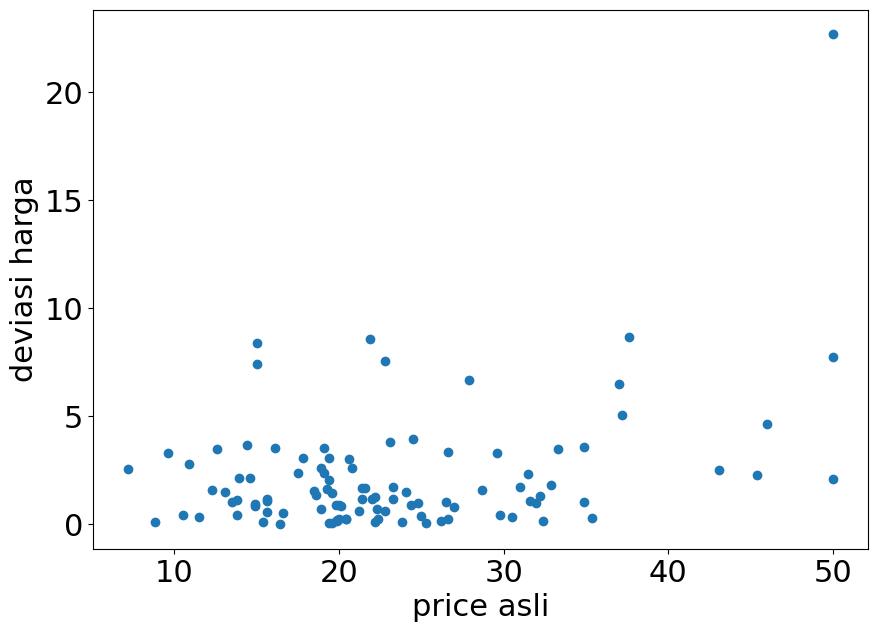

In [73]:
price_deviation = np.abs(y_test - y_pred_test)

plt.scatter(y_test, price_deviation)
plt.xlabel("price asli")
plt.ylabel("deviasi harga")

plt.show()

**Observasi**
- Performa model bagus saat memprediksi data  price di rentan 10-40
- Di atas itu, performa model turun.

**Action**
- EDA data-data dengan price yang tinggi.
- Putuskan apakah perlu filtering outlier, atau mencari tambahan data agar bisa belajar data yang price-nya tinggi.